<a href="https://colab.research.google.com/github/Vijay1126/Deep-Learning/blob/master/Lesson_2/Ferrai_Tesla_Maserati_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

Here the downloading of the image is not done in order

In [0]:
folder = 'ferrari'
file = 'ferrari.csv'

In [0]:
folder = 'tesla'
file = 'tesla.csv'

In [0]:
folder = 'maserati'
file = 'maserati.csv'

In [0]:
path = Path('data/cars')
dest = path/folder
dest.mkdir(parents= True, exist_ok = True)

In [29]:
path.ls()

[PosixPath('data/cars/tesla'),
 PosixPath('data/cars/ferrari'),
 PosixPath('data/cars/maserati'),
 PosixPath('data/cars/.ipynb_checkpoints')]

In [0]:
classes = ['ferrari', 'tesla', 'maserati']

In [31]:
download_images(path/'maserati'/file,dest,max_pics=200,max_workers=0)

In [0]:
??download_images

In [33]:
for c in classes:
  print(c)
  verify_images(path/c, delete = True, max_size=500)

ferrari


tesla


maserati


The valid_pct indicates the percentage split for the data 

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.3,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [40]:
doc(ImageDataBunch)

In [35]:
data.classes

['ferrari', 'maserati', 'tesla']

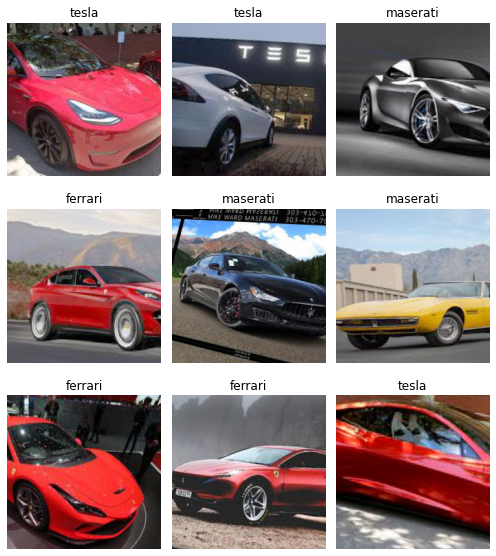

In [36]:
data.show_batch(rows=3, figsize=(7,8))

In [44]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ferrari', 'maserati', 'tesla'], 3, 168, 72)

In [0]:
learn = cnn_learner(data, models.resnet101, metrics = error_rate)

In [51]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.904346,1.153232,0.555556,00:06
1,1.584567,0.806293,0.347222,00:06
2,1.280454,0.658994,0.194444,00:06
3,1.050911,0.727099,0.208333,00:06
4,0.879804,0.971061,0.236111,00:06
5,0.763671,1.042718,0.263889,00:06
6,0.679194,1.076878,0.263889,00:06
7,0.616308,1.085052,0.236111,00:06
8,0.557356,1.052228,0.236111,00:06
9,0.516371,1.031923,0.222222,00:06


In [54]:
iterp = ClassificationInterpretation.from_learner(learn)

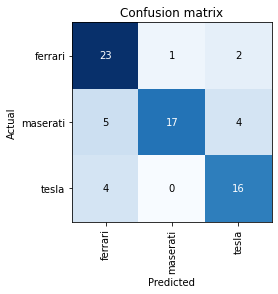

In [55]:
iterp.plot_confusion_matrix()

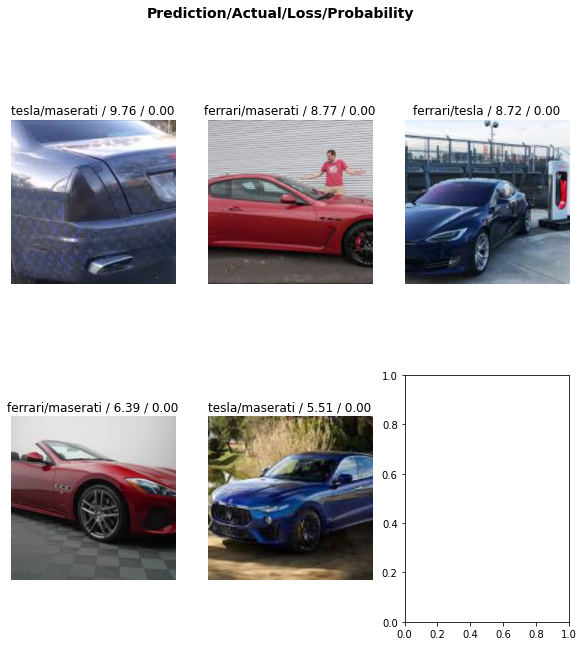

In [60]:
iterp.plot_top_losses(5, figsize=(10,10))